In [1]:
import os, sys
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast
import numpy as np

dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
dir0 = os.path.dirname(dir1)  # One level above dir1

plt.rcParams.update({
    'figure.dpi': 300,
    'axes.labelsize': 30.0,
    'axes.titlesize': 30.0,
    'axes.labelweight': 'normal',
    'axes.linewidth': 1.25,
    'legend.fontsize': 25,
    'legend.title_fontsize': 18.0,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'lines.linewidth': 2.0,
    'lines.markersize': 6.0,
    'grid.color': '.8',
    'grid.linestyle': '-',
    'grid.linewidth': 1.0,
})

if dir1 not in sys.path: sys.path.append(dir0)

from src.config import PPOConfig
from src.utils import ExperimentUtils

In [2]:
def plot_variance(path):
    df = pd.read_csv(path)
    df["rewards"] = df["rewards"].apply(ast.literal_eval)
    df["rewards"] = df["rewards"].apply(lambda outer: [np.mean(inner) for inner in outer])

    df_exploded = df.explode("rewards")
    df_exploded["rewards"] = df_exploded["rewards"].astype(float)

    # Initialize the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df_exploded, x="agents", y="rewards", hue="strategy", dodge=True)

    # Final touches
    plt.ylabel("Mean Reward")
    plt.xlabel("Agents")
    ax.get_legend().remove()

    # Get positions and draw lines/text
    positions = ax.get_xticks()
    unique_agents = df_exploded["agents"].unique()
    for pos, agent_count in zip(positions, unique_agents):
        group_mean = df_exploded[df_exploded["agents"] == agent_count]["rewards"].mean()
        ax.hlines(group_mean, pos - 0.4, pos + 0.4, colors="black", linestyles="--", linewidth=1.5)

        # Text to the left of the line, centered vertically
        ax.text(pos - 0.4, group_mean, f"{group_mean:.1f}",
                ha="right", va="center", fontsize=18, color="black")

    plt.tight_layout()
    plt.show()
    return df_exploded


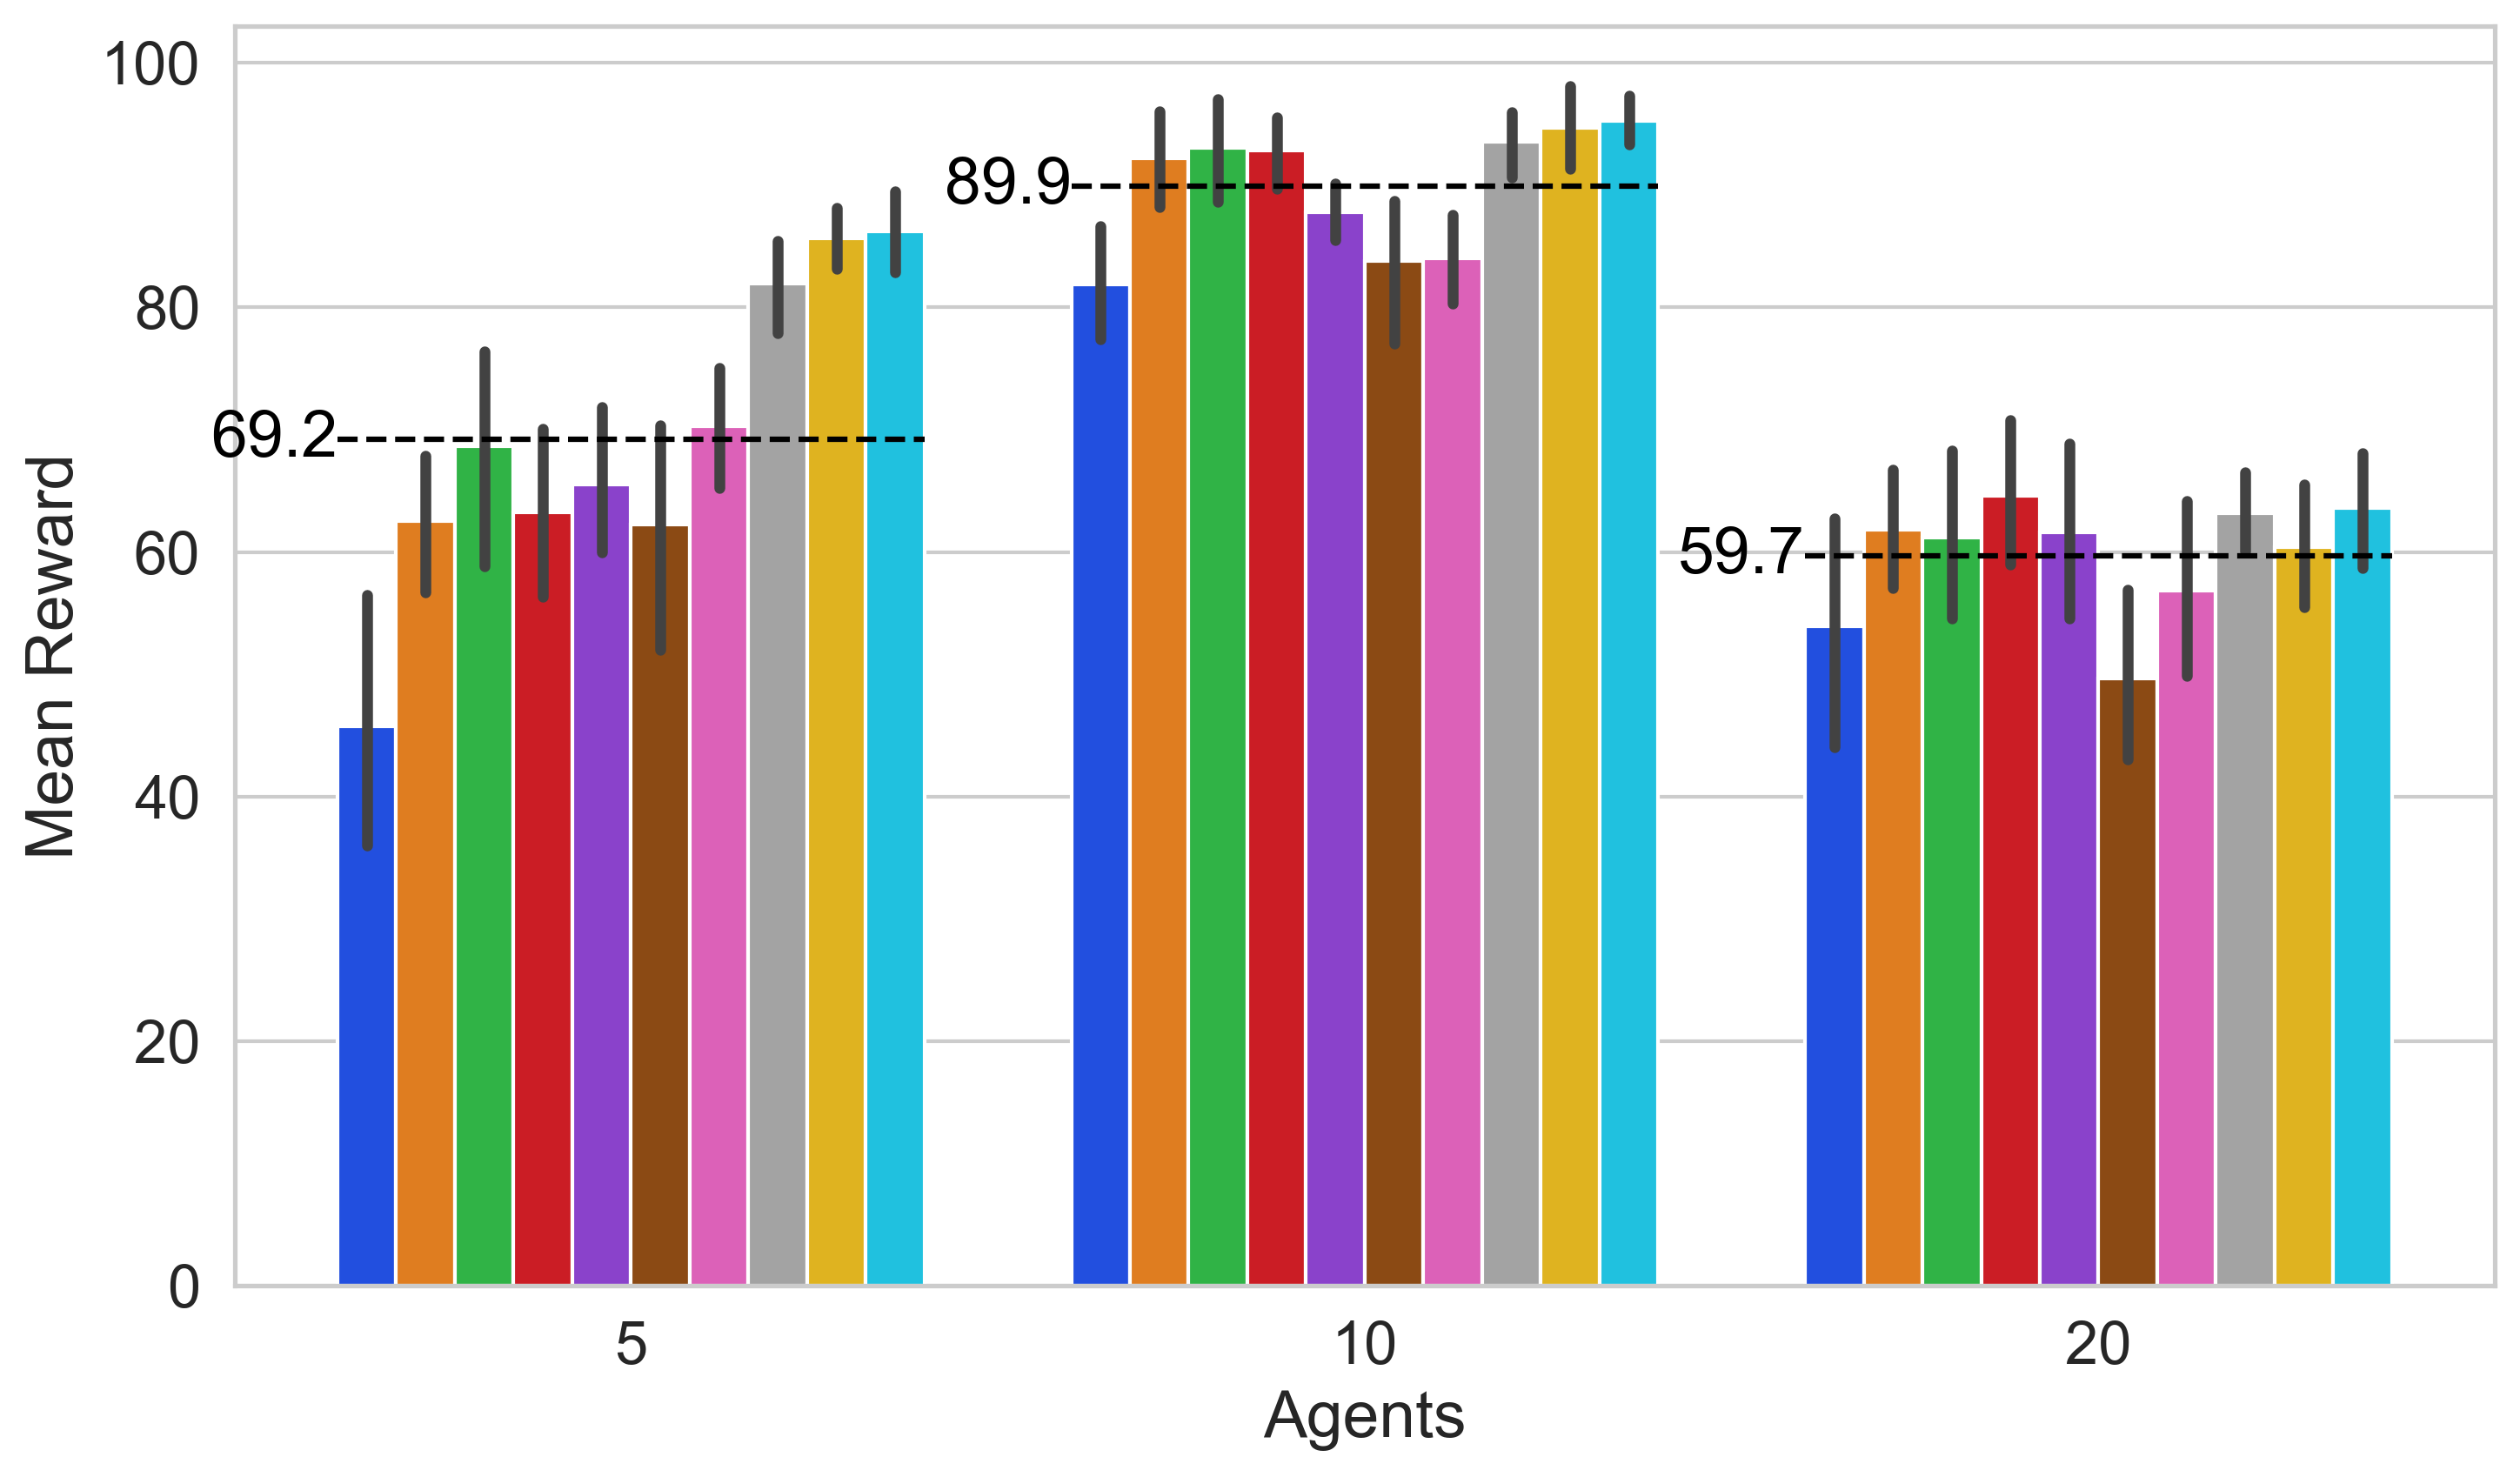

In [3]:
path = '/src/experiments_ma/7_generalizability/saved_experiments/variance/1_high_variance_rollout.csv'
df_exp=plot_variance(path)


In [4]:
path = '/src/experiments_ma/7_generalizability/saved_experiments_old/low_variance_new_rollout.csv'
df_exp=plot_variance(path)


FileNotFoundError: [Errno 2] No such file or directory: '/src/experiments_ma/7_generalizability/saved_experiments_old/low_variance_new_rollout.csv'

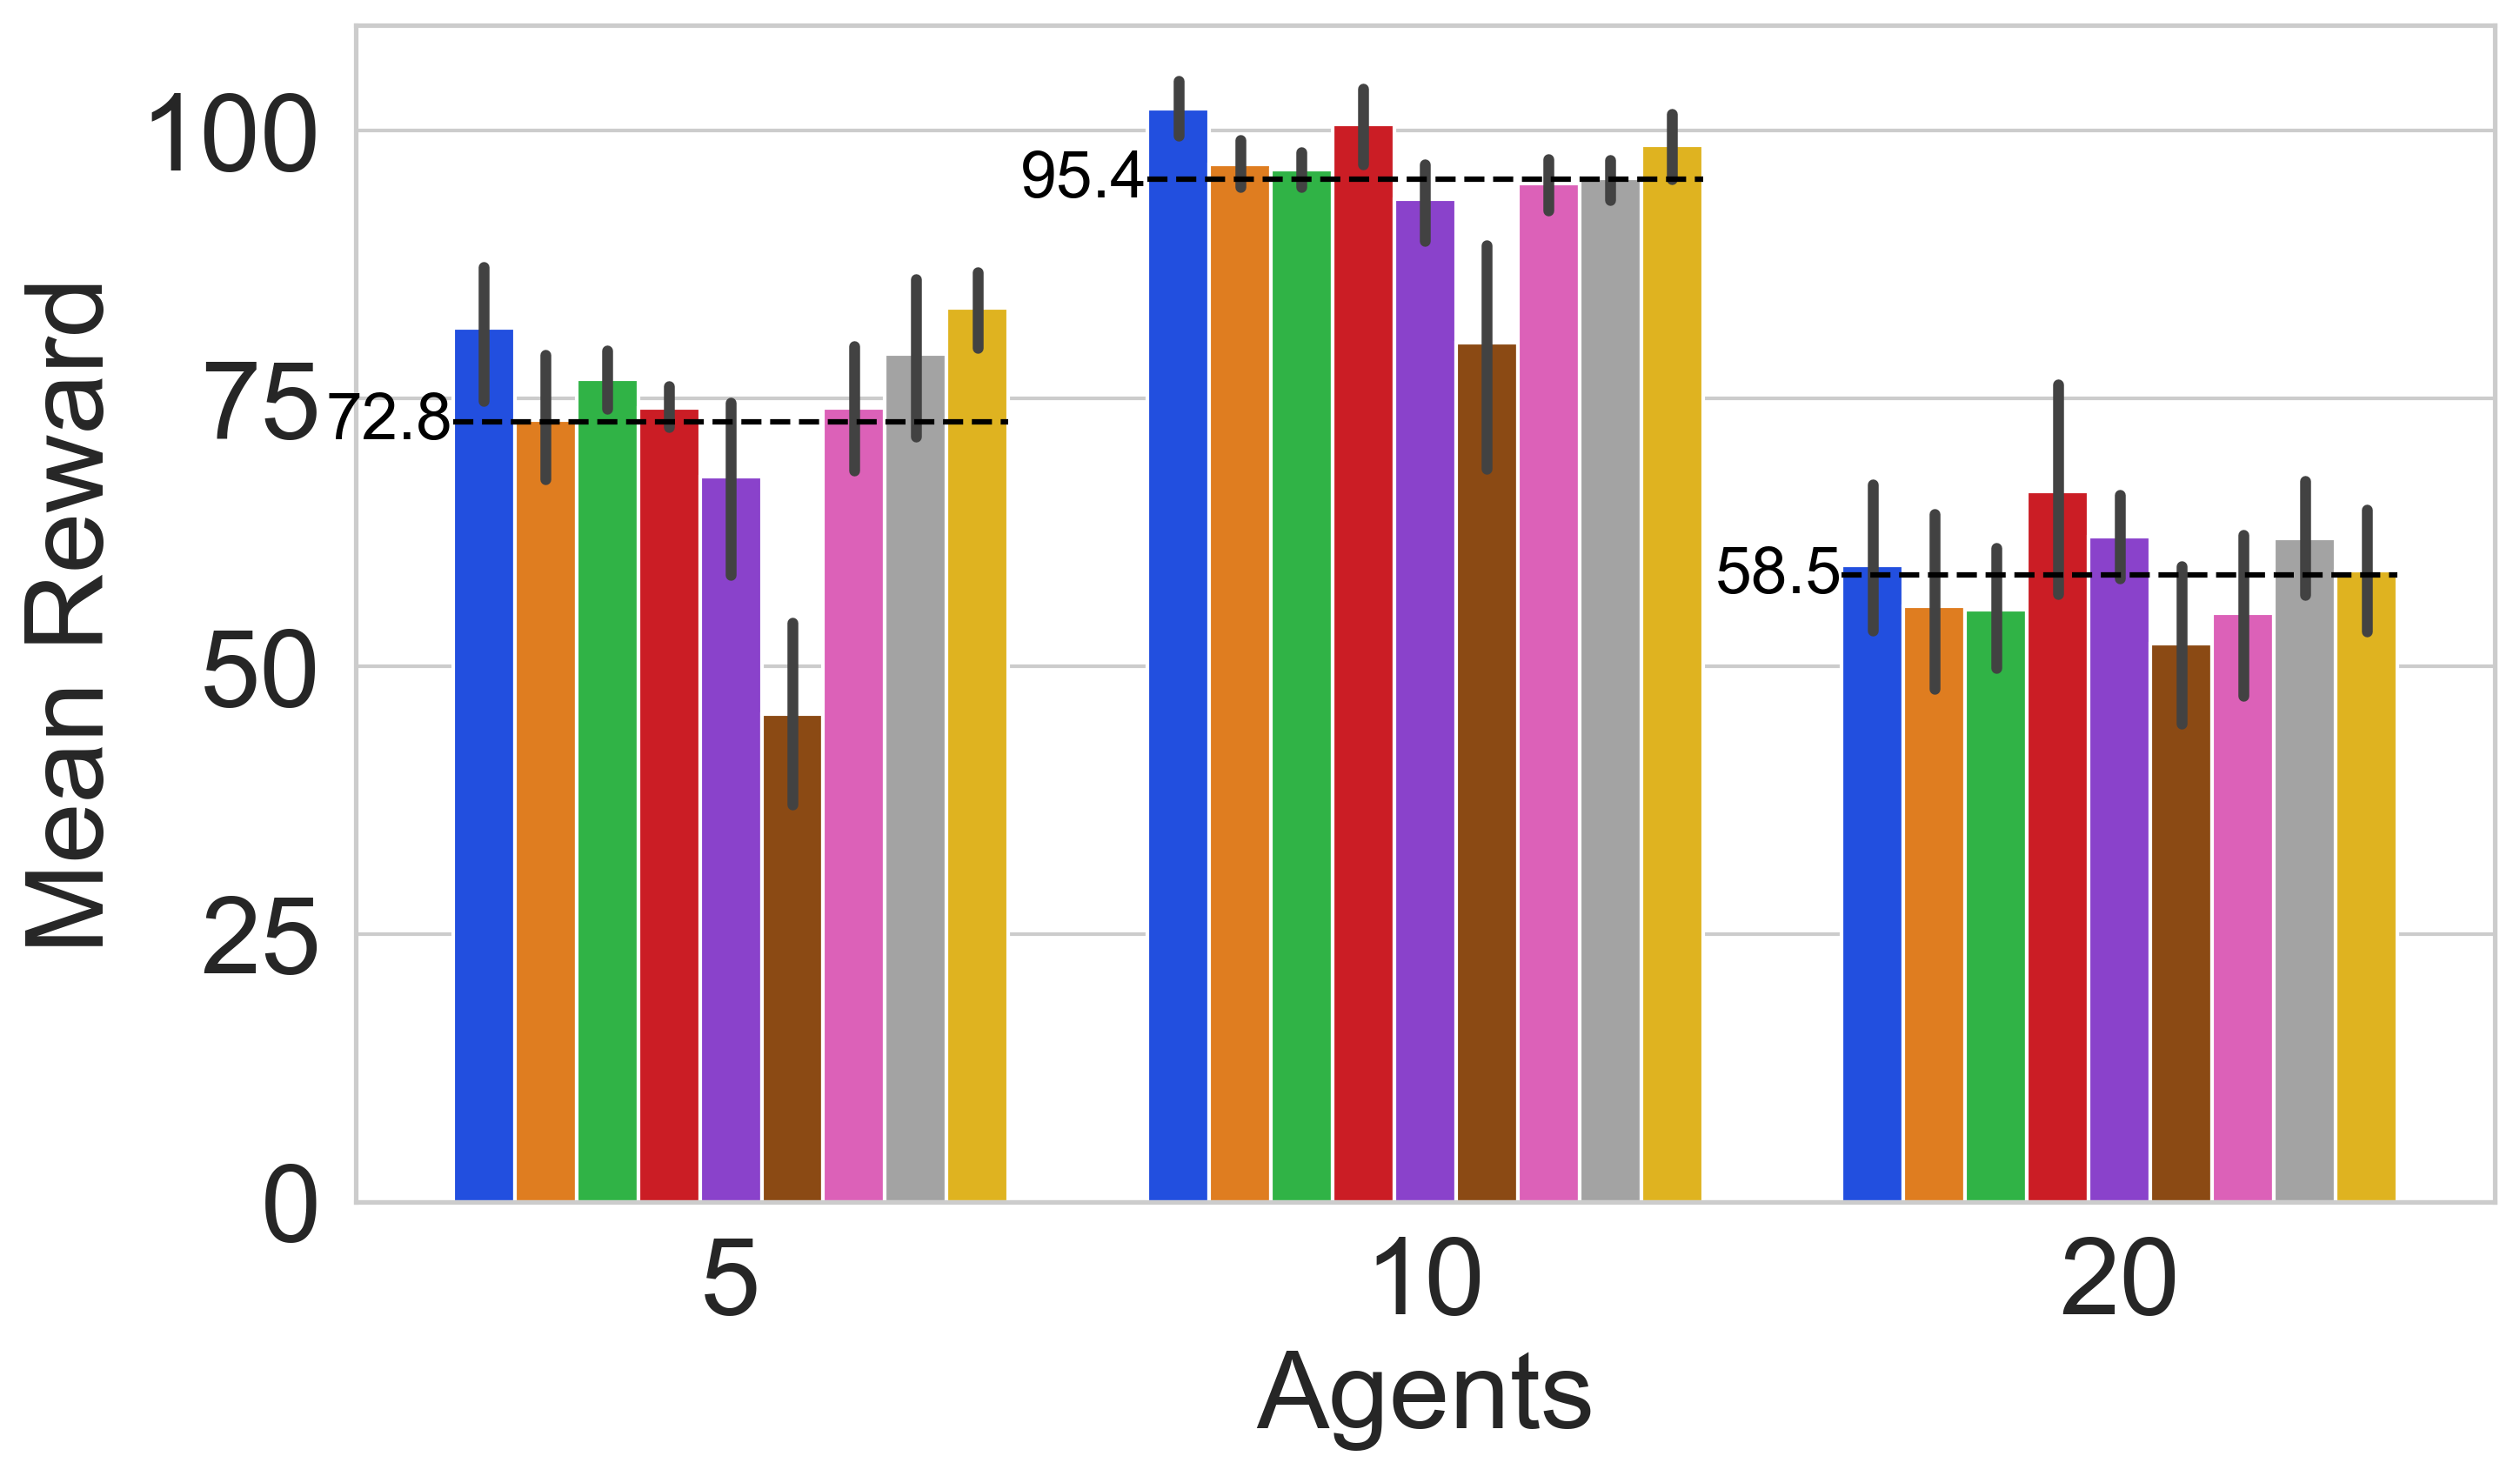

In [9]:
path = '/src/experiments_ma/7_generalizability/saved_experiments_old/no_variance_new_rollout.csv'
df_exp=plot_variance(path)
